In [1]:
#import data manipulation libraries
import pandas as pd
import numpy as np

In [18]:
#import data visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
rcParams['lines.linewidth']=2.5
rcParams['axes.prop_cycle']=cycler(color=['#365977'])

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Sales Forecasting/Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**About data**



    Store - the store number

    Date - the week of sales

    Weekly_Sales - sales for the given store

    Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

    Temperature - Temperature on the day of sale

    Fuel_Price - Cost of fuel in the region

    CPI – Prevailing consumer price index

    Unemployment - Prevailing unemployment rate

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Converting the date into datetime

In [7]:
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')

In [8]:
df.Date.max(),df.Date.min()

(Timestamp('2012-10-26 00:00:00'), Timestamp('2010-02-05 00:00:00'))

Taking only date and sales column further analysis

In [9]:
time_df=df[['Date','Weekly_Sales']]

In [10]:
time_df.head()

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


In [12]:
time_df.set_index('Date',inplace=True)

In [13]:
time_df.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


# **Resampling**

To change aggregation level of time series based on requirement

**Examinig Weekly Sales**

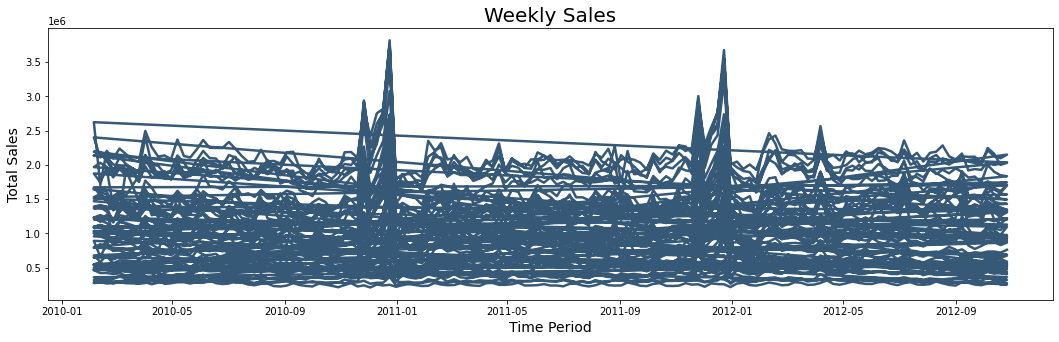

In [26]:
plt.figure(figsize=(18,5))
plt.title('Weekly Sales',size=20)
plt.xlabel('Time Period',size=14)
plt.ylabel('Total Sales',size=14)
plt.plot(time_df['Weekly_Sales'])


In [21]:
monthly_sales=time_df.resample(rule='M').sum()
monthly_sales.rename(columns={'Weekly_Sales':'Sales'},inplace=True)
monthly_sales.head()

,Sales
Date,
2010-02-28,1.903330e+08
2010-03-31,1.819198e+08
2010-04-30,2.314124e+08
2010-05-31,1.867109e+08
2010-06-30,1.922462e+08


**Monthly Sales**

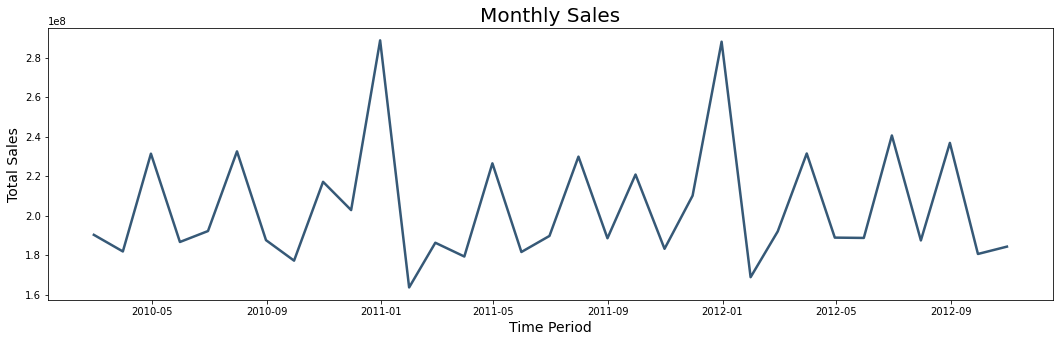

In [25]:
plt.figure(figsize=(18,5))
plt.title('Monthly Sales',size=20)
plt.xlabel('Time Period',size=14)
plt.ylabel('Total Sales',size=14)
plt.plot(monthly_sales['Sales'])


**Quarterly Sales**

In [29]:
quarterly_sales=time_df.resample(rule='Q').mean()
quarterly_sales.rename(columns={'Weekly_Sales':'Sales'},inplace=True)
quarterly_sales.head()

,Sales
Date,
2010-03-31,1.034036e+06
2010-06-30,1.043367e+06
2010-09-30,1.021347e+06
2010-12-31,1.125041e+06
2011-03-31,9.803551e+05


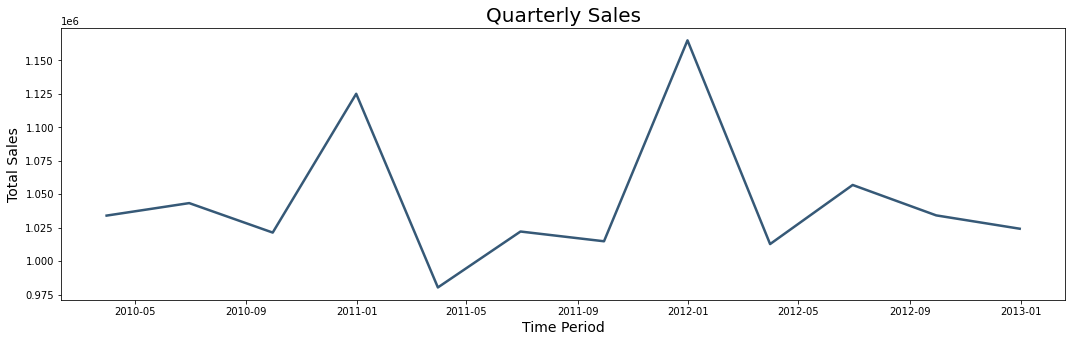

In [30]:
plt.figure(figsize=(18,5))
plt.title('Quarterly Sales',size=20)
plt.xlabel('Time Period',size=14)
plt.ylabel('Total Sales',size=14)
plt.plot(quarterly_sales['Sales'])

**Yearly Sales**

In [48]:
yearly_sales=time_df.resample(rule='Y').sum()
yearly_sales.rename(columns={'Weekly_Sales':'Sales'},inplace=True)
yearly_sales.head()

,Sales
Date,
2010-12-31,2.288886e+09
2011-12-31,2.448200e+09
2012-12-31,2.000133e+09


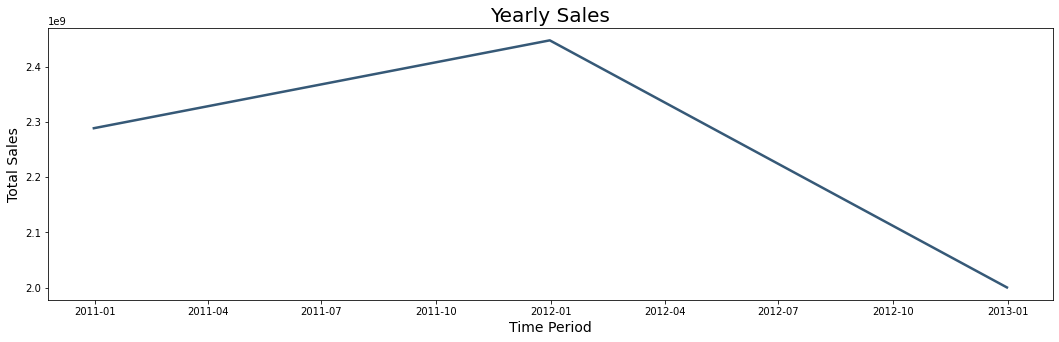

In [49]:
plt.figure(figsize=(18,5))
plt.title('Yearly Sales',size=20)
plt.xlabel('Time Period',size=14)
plt.ylabel('Total Sales',size=14)
plt.plot(yearly_sales['Sales'])

As we can clearly see the sales were high during the year of 2011 and start of 2012 but they started to dip by going forward in 2012

# Shifting

To move time series up or down

In [33]:
df_shift_down=time_df.copy()
df_shift_down['1_week_shift']=time_df['Weekly_Sales'].shift(1)
df_shift_down['2_week_shift']=time_df['Weekly_Sales'].shift(2)
df_shift_down.head()

,Weekly_Sales,1_week_shift,2_week_shift
Date,,,
2010-02-05,1643690.90,NaN,NaN
2010-02-12,1641957.44,1643690.90,NaN
2010-02-19,1611968.17,1641957.44,1643690.90
2010-02-26,1409727.59,1611968.17,1641957.44
2010-03-05,1554806.68,1409727.59,1611968.17


In [34]:
df_shift_up=time_df.copy()
df_shift_up['1_week_shift']=time_df['Weekly_Sales'].shift(-1)
df_shift_up['2_week_shift']=time_df['Weekly_Sales'].shift(-2)
df_shift_up.head()

,Weekly_Sales,1_week_shift,2_week_shift
Date,,,
2010-02-05,1643690.90,1641957.44,1611968.17
2010-02-12,1641957.44,1611968.17,1409727.59
2010-02-19,1611968.17,1409727.59,1554806.68
2010-02-26,1409727.59,1554806.68,1439541.59
2010-03-05,1554806.68,1439541.59,1472515.79


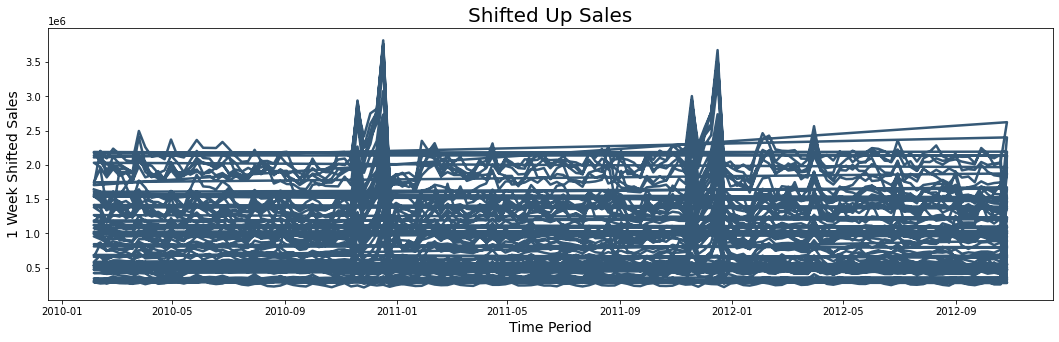

In [46]:
plt.figure(figsize=(18,5))
plt.title('Shifted Up Sales',size=20)
plt.xlabel('Time Period',size=14)
plt.ylabel('1 Week Shifted Sales',size=14)
plt.plot(df_shift_up['1_week_shift'])

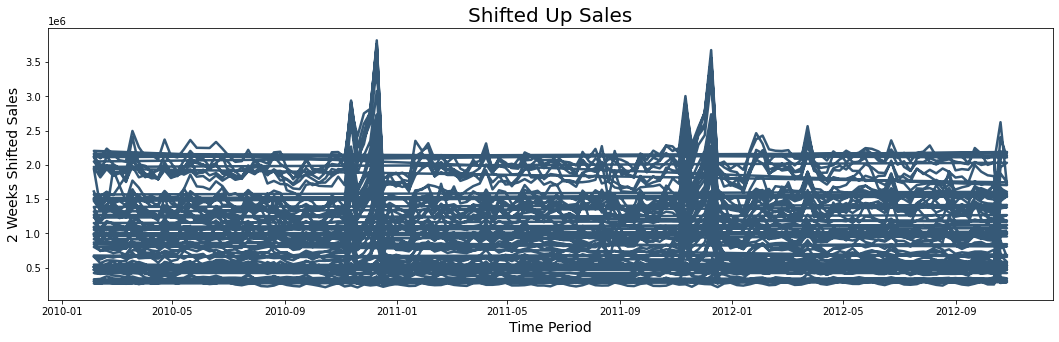

In [47]:
plt.figure(figsize=(18,5))
plt.title('Shifted Up Sales',size=20)
plt.xlabel('Time Period',size=14)
plt.ylabel('2 Weeks Shifted Sales',size=14)
plt.plot(df_shift_up['2_week_shift'])

# Rolling or Moving Averages

Used to smoothen the time series data

In [37]:
df_rolling=time_df.copy()
df_rolling['MonthlyRolling']=df_rolling['Weekly_Sales'].rolling(4).sum()
df_rolling['QuarterlyRolling']=df_rolling['Weekly_Sales'].rolling(3).mean()
df_rolling.head(10)

,Weekly_Sales,MonthlyRolling,QuarterlyRolling
Date,,,
2010-02-05,1643690.90,NaN,NaN
2010-02-12,1641957.44,NaN,NaN
2010-02-19,1611968.17,NaN,1.632539e+06
2010-02-26,1409727.59,6307344.10,1.554551e+06
2010-03-05,1554806.68,6218459.88,1.525501e+06
2010-03-12,1439541.59,6016044.03,1.468025e+06
2010-03-19,1472515.79,5876591.65,1.488955e+06
2010-03-26,1404429.92,5871293.98,1.438829e+06
2010-04-02,1594968.28,5911455.58,1.490638e+06


In [38]:
df_rolling.tail(10)

,Weekly_Sales,MonthlyRolling,QuarterlyRolling
Date,,,
2012-08-24,718232.26,2899496.02,724588.836667
2012-08-31,734297.87,2908064.38,725009.020000
2012-09-07,766512.66,2941539.72,739680.930000
2012-09-14,702238.27,2921281.06,734349.600000
2012-09-21,723086.20,2926135.00,730612.376667
2012-09-28,713173.95,2905011.08,712832.806667
2012-10-05,733455.07,2871953.49,723238.406667
2012-10-12,734464.36,2904179.58,727031.126667
2012-10-19,718125.53,2899218.91,728681.653333


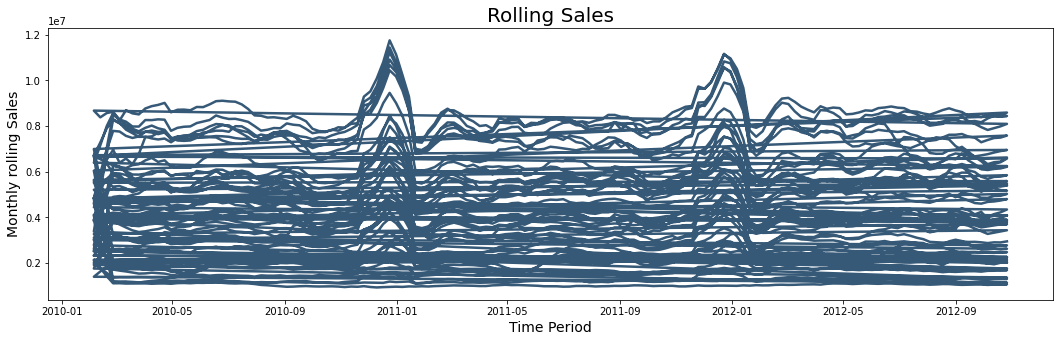

In [45]:
plt.figure(figsize=(18,5))
plt.title('Rolling Sales',size=20)
plt.xlabel('Time Period',size=14)
plt.ylabel('Monthly rolling Sales',size=14)
plt.plot(df_rolling['MonthlyRolling'])

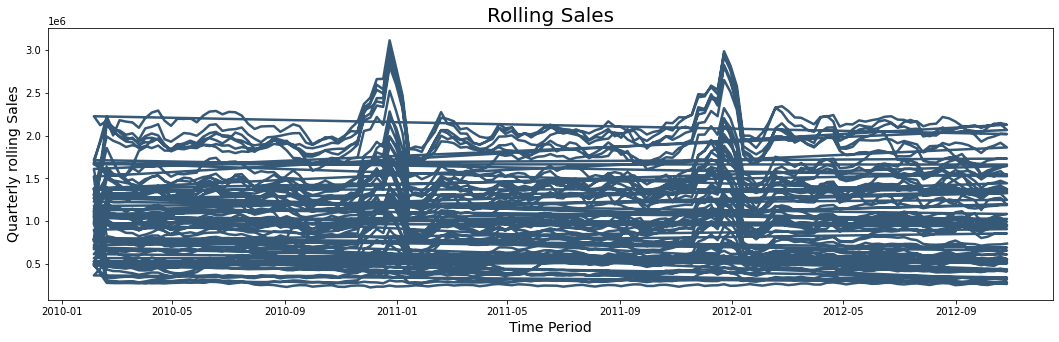

In [44]:
plt.figure(figsize=(18,5))
plt.title('Rolling Sales',size=20)
plt.xlabel('Time Period',size=14)
plt.ylabel('Quarterly rolling Sales',size=14)
plt.plot(df_rolling['QuarterlyRolling'])

# Differencing

It is used to make the time series stationary

In [40]:
df_diff=time_df.copy()
df_diff['Diff_1']=df_diff['Weekly_Sales'].diff(periods=1)
df_diff['Diff_2']=df_diff['Weekly_Sales'].diff(periods=3)
df_diff.head(10)

,Weekly_Sales,Diff_1,Diff_2
Date,,,
2010-02-05,1643690.90,NaN,NaN
2010-02-12,1641957.44,-1733.46,NaN
2010-02-19,1611968.17,-29989.27,NaN
2010-02-26,1409727.59,-202240.58,-233963.31
2010-03-05,1554806.68,145079.09,-87150.76
2010-03-12,1439541.59,-115265.09,-172426.58
2010-03-19,1472515.79,32974.20,62788.20
2010-03-26,1404429.92,-68085.87,-150376.76
2010-04-02,1594968.28,190538.36,155426.69


In [53]:
1643690.90-1409727.59

233963.30999999982

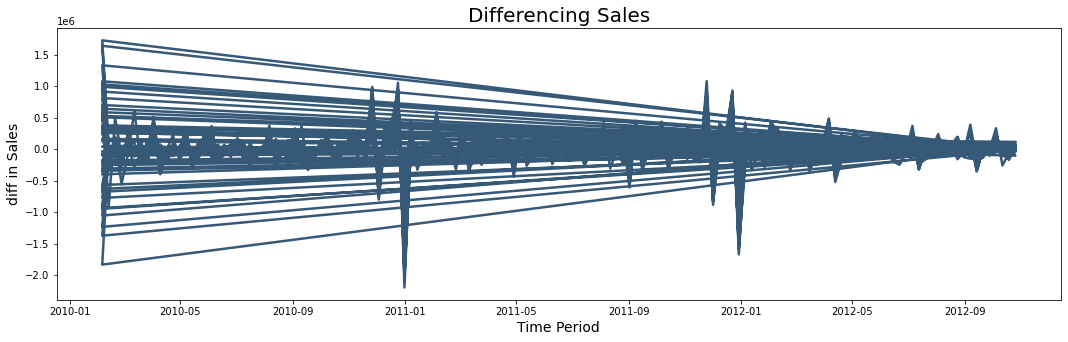

In [50]:
plt.figure(figsize=(18,5))
plt.title('Differencing Sales',size=20)
plt.xlabel('Time Period',size=14)
plt.ylabel('diff in Sales',size=14)
plt.plot(df_diff['Diff_1'])

By looking at plot we can see various month differencing is going negative which drop in sales but this drop reduced in 2012